date             0
time             0
comp             0
round            0
day              0
venue            0
result           0
gf               0
ga               0
opponent         0
xg               0
xga              0
poss             0
attendance       0
captain          0
formation        0
referee          0
match report     0
notes           19
sh               0
sot              0
dist             0
fk               0
pk               0
pkatt            0
dtype: int64


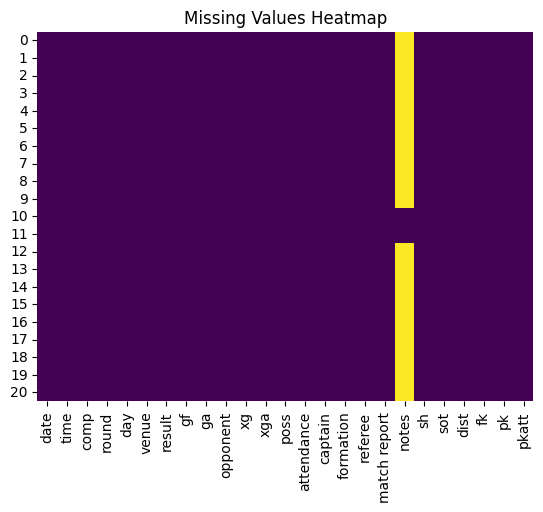

                      date         gf         ga         xg        xga  \
count                   21  21.000000  21.000000  21.000000  21.000000   
mean   2024-01-15 00:00:00   2.761905   0.904762   1.690476   0.880952   
min    2023-08-11 00:00:00   0.000000   0.000000   0.600000   0.300000   
25%    2023-11-04 00:00:00   2.000000   0.000000   1.000000   0.600000   
50%    2023-12-27 00:00:00   3.000000   1.000000   1.400000   0.800000   
75%    2024-04-09 00:00:00   3.000000   1.000000   1.900000   1.100000   
max    2024-05-19 00:00:00   6.000000   3.000000   4.100000   2.300000   
std                    NaN   1.480026   0.830949   0.904381   0.476045   

            poss    attendance         sh        sot       dist         fk  \
count  21.000000     21.000000  21.000000  21.000000  21.000000  21.000000   
mean   64.285714  46322.142857  18.952381   6.857143  17.076190   0.571429   
min    47.000000  17096.000000   4.000000   1.000000  11.100000   0.000000   
25%    59.000000  393

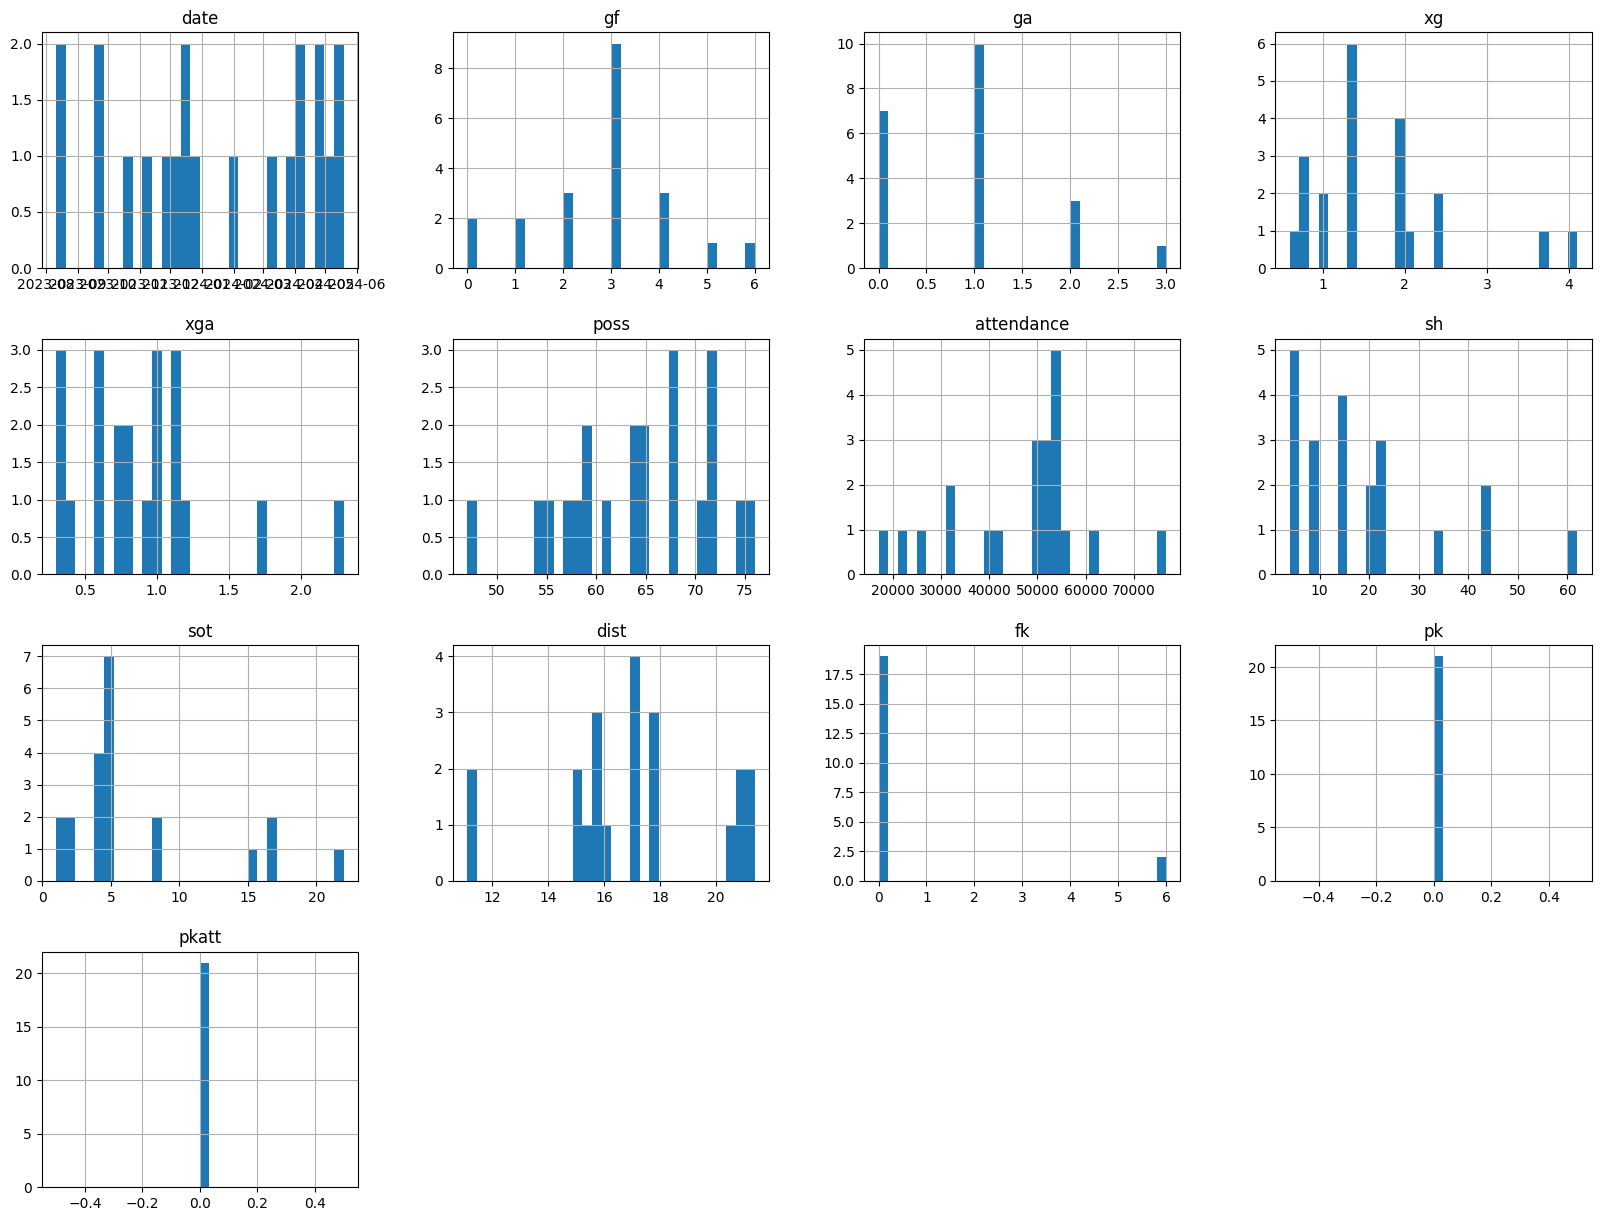

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("matches.csv")

# Check for missing values
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Drop unnecessary columns
df = df.drop(columns=['match report', 'notes'])

# Convert date columns to datetime
df['date'] = pd.to_datetime(df['date'])

# Summary statistics
print(df.describe())

# Visualize distributions of numerical features
df.hist(bins=30, figsize=(20,15))
plt.show()

In [7]:
# Feature Engineering

# Extract hour from time
df['hour'] = df['time'].str[:2].astype(int)

# Create goal difference feature
df['goal_difference'] = df['gf'] - df['ga']

# One-hot encode categorical variables, including 'comp' and 'round'
df = pd.get_dummies(df, columns=['day', 'venue', 'opponent', 'formation', 'captain', 'referee', 'comp', 'round'], drop_first=True)

# Drop unnecessary columns
df = df.drop(columns=['time', 'date'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Prepare features and target variable
X = df.drop(columns=['result'])  # Drop target column
y = df['result']  # Target variable

# Encode target variable
y = y.map({'W': 1, 'L': 0, 'D': 2})  # Example encoding: Win = 1, Loss = 0, Draw = 2

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8


In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the data
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [12]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming clf is your trained model
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {indices[i]} ({importances[indices[i]]})")

# Select top N features
N = 10
selected_features = indices[:N]

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Retrain model with selected features
clf.fit(X_train_selected, y_train)
y_pred_selected = clf.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy with selected features: {accuracy_selected}')


Feature ranking:
1. feature 13 (0.1429607848848279)
2. feature 0 (0.09165829171315545)
3. feature 57 (0.08479130297433612)
4. feature 3 (0.07560599146404935)
5. feature 12 (0.06605580362630371)
6. feature 62 (0.06488278296173697)
7. feature 2 (0.06480542411129087)
8. feature 35 (0.05914387634922063)
9. feature 5 (0.04430887019225447)
10. feature 1 (0.040134454331002524)
11. feature 4 (0.03846025005450323)
12. feature 8 (0.032432403623802855)
13. feature 69 (0.02540744701720006)
14. feature 40 (0.025341428938583165)
15. feature 16 (0.021328192663369935)
16. feature 6 (0.014567193314219485)
17. feature 18 (0.013445378151260503)
18. feature 41 (0.012523197343443773)
19. feature 48 (0.012461151478917961)
20. feature 15 (0.009387843094701007)
21. feature 7 (0.00866579470611478)
22. feature 64 (0.0075098482943592336)
23. feature 46 (0.006893186116025132)
24. feature 39 (0.006130976307258692)
25. feature 20 (0.00545560207152176)
26. feature 21 (0.005364177353113737)
27. feature 42 (0.00366054

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting model
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_clf.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')


Gradient Boosting Accuracy: 1.0


In [14]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_scaled, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}')


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.8  1.   0.75 0.75 0.75]
Mean cross-validation score: 0.8099999999999999


In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Confusion Matrix:
[[4 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
import joblib
import numpy as np
from sklearn.metrics import accuracy_score

# Define your feature selection process
def select_top_n_features(importances, n=10):
    indices = np.argsort(importances)[::-1]
    selected_features = indices[:n]
    return selected_features

# Use the best model found by grid search
best_clf = grid_search.best_estimator_

# Save the model
joblib.dump(best_clf, 'best_random_forest_model.pkl')

# Save the selected features
importances = best_clf.feature_importances_
selected_features = select_top_n_features(importances, N)
joblib.dump(selected_features, 'selected_features.pkl')

# Load the model
loaded_clf = joblib.load('best_random_forest_model.pkl')

# Load the selected features
loaded_selected_features = joblib.load('selected_features.pkl')

# Ensure you select the same features from the training and test sets
X_train_selected = X_train[:, loaded_selected_features]
X_test_selected = X_test[:, loaded_selected_features]

# Verify the loaded model by making predictions or checking its accuracy
y_pred_loaded = loaded_clf.predict(X_test_selected)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

print(f'Accuracy of the loaded model: {accuracy_loaded}')


ValueError: X has 10 features, but RandomForestClassifier is expecting 71 features as input.